### TEAM 9 : 
-Ahmed zaher,
-khadija ait m'hamed,
-Mohammed Amakrane, 
-fatima zahra timi

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## • Date : La date de l'accident d'avion.
## • Time : L'heure de l'accident d'avion.
## • Location : L'emplacement (ville, pays) où l'accident d'avion s'est produit.
## • Operator : La compagnie aérienne ou l'entreprise exploitant l'aéronef.
## • Flight # : Le numéro de vol associé à l'aéronef.
## • Route : La route ou le trajet du vol de l'aéronef.
## • Type : Le type ou modèle de l'aéronef.
## • Registration : Le numéro d'immatriculation attribué à l'aéronef.
## • cn/In : Le numéro de construction ou le numéro de série du fabricant de l'aéronef.
## • Aboard : Le nombre total de personnes à bord de l'aéronef (passagers et équipage).
## • Fatalities : Le nombre total de décès dans l'accident d'avion.
## • Ground : Le nombre de décès au sol (non-passagers).
## • Summary : Un bref résumé ou une description de l'accident d'avion.

#### • Date : La date de l'accident d'avion.
#### • Time : L'heure de l'accident d'avion.
#### • Location : L'emplacement (ville, pays) où l'accident d'avion s'est produit.
#### • Operator : La compagnie aérienne ou l'entreprise exploitant l'aéronef.
#### • Flight # : Le numéro de vol associé à l'aéronef.
#### • Route : La route ou le trajet du vol de l'aéronef.
#### • Type : Le type ou modèle de l'aéronef.
#### • Registration : Le numéro d'immatriculation attribué à l'aéronef.
#### • cn/In : Le numéro de construction ou le numéro de série du fabricant de l'aéronef.
#### • Aboard : Le nombre total de personnes à bord de l'aéronef (passagers et équipage).
#### • Fatalities : Le nombre total de décès dans l'accident d'avion.
#### • Ground : Le nombre de décès au sol (non-passagers).
#### • Summary : Un bref résumé ou une description de l'accident d'avion.

# lire les donnees

In [264]:
data = pd.read_csv("data.csv")
data.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


### Date & Time : 

In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [266]:
# 1- Nettoyer la colonne Time
data['Time'] = data['Time'].replace(np.nan, '00:00') 
data['Time'] = data['Time'].str.replace('c: ', '').str.replace('c:', '').str.replace('c', '', regex=True)
data['Time'] = data['Time'].str.replace('12\'20', '12:20', regex=True).str.replace('18.40', '18:40', regex=True).str.replace('0943', '09:43', regex=True)
data['Time'] = data['Time'].str.replace('22\'08', '22:08', regex=True).str.replace('114:20', '00:00', regex=True)

# 2- Extraire l'heure de la colonne 'Time'
data['Hour'] = data['Time'].str.split(':').str[0].astype(int)

# 3- Combinaison des colonnes Date et Time
data['DateTime'] = data['Date'] + ' ' + data['Time']

# 4- Convertir au format datetime
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
data['DateTime'] = data['DateTime'].apply(todate)

# 5- Extraire l'année, le mois et le jour de DateTime
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day

print('Date ranges from ' + str(data.DateTime.min()) + ' to ' + str(data.DateTime.max()))


Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


### Renommer la colonne 'Date' avant de la convertir en type datetime

In [267]:
data.rename(columns={'Date': 'Original_Date'}, inplace=True)
data.head(5)

,Original_Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Hour,DateTime,Year,Month,Day
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908-09-17 17:18:00,1908,9,17
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,6,1912-07-12 06:30:00,1912,7,12
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0,1913-08-06 00:00:00,1913,8,6
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,18,1913-09-09 18:30:00,1913,9,9
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10,1913-10-17 10:30:00,1913,10,17


#### Convertir la colonne 'Original_Date' en type datetime 

In [291]:
data['Original_Date'] = pd.to_datetime(data['Original_Date'], errors='coerce')
print(data['Original_Date'].dtype)

datetime64[ns]


### Identifiez les valeurs manquantes pour chaque colonne

In [269]:
print("Identifiez les valeurs manquantes pour chaque colonne")
missing_values = data.isnull()
missing_values

Identifiez les valeurs manquantes pour chaque colonne


,Original_Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Hour,DateTime,Year,Month,Day
0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5264,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
5265,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5266,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


### Obtenez le nombre total de valeurs manquantes par colonne :

In [270]:
total_missing = missing_values.sum()

### Obtenez le pourcentage de valeurs manquantes par colonne

In [271]:
percentage_missing = (total_missing / data.shape[0]) * 100

### Créez un DataFrame récapitulatif des valeurs manquantes

In [272]:
missing_summary = pd.DataFrame({
    'Total Missing': total_missing,
    'Percentage Missing': percentage_missing
})
print(missing_summary)

               Total Missing  Percentage Missing
Original_Date              0            0.000000
Time                       0            0.000000
Location                  20            0.379651
Operator                  18            0.341686
Flight #                4199           79.707669
Route                   1707           32.403189
Type                      27            0.512528
Registration             335            6.359150
cn/In                   1228           23.310554
Aboard                    22            0.417616
Fatalities                12            0.227790
Ground                    22            0.417616
Summary                  390            7.403189
Hour                       0            0.000000
DateTime                   0            0.000000
Year                       0            0.000000
Month                      0            0.000000
Day                        0            0.000000


#### Les colonnes comportant de nombreuses valeurs manquantes et pouvant être supprimées incluent :Flight #, Route, Registeration, cn/In

In [273]:
del data["Flight #"]
del data["Route"]
del data["cn/In"]
del data["Registration"]

### lire les donnees : 

In [274]:
data.head(3)

,Original_Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Hour,DateTime,Year,Month,Day
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908-09-17 17:18:00,1908,9,17
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,6,1912-07-12 06:30:00,1912,7,12
2,1913-08-06,00:00,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0,1913-08-06 00:00:00,1913,8,6


In [275]:
data.shape

(5268, 14)

### Supprimez les lignes avec des valeurs manquantes

In [276]:
df_cleaned = data.dropna()
print("le nombres des Lignes après la suppression :")
df_cleaned.shape

le nombres des Lignes après la suppression :


(4814, 14)

### Vérifier les doublons

In [277]:
df_cleaned[df_cleaned.duplicated(keep= False) == True]

,Original_Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Hour,DateTime,Year,Month,Day


### Affichage du pourcentage de valeurs manquantes après le nettoyage :

In [278]:
p=100 * df_cleaned.isnull().sum() / len(df_cleaned)
p

Original_Date    0.0
Time             0.0
Location         0.0
Operator         0.0
Type             0.0
Aboard           0.0
Fatalities       0.0
Ground           0.0
Summary          0.0
Hour             0.0
DateTime         0.0
Year             0.0
Month            0.0
Day              0.0
dtype: float64

### Vérification finale 

In [279]:
print("Vérification finale :")
df_cleaned

Vérification finale :


,Original_Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Hour,DateTime,Year,Month,Day
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",17,1908-09-17 17:18:00,1908,9,17
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,6,1912-07-12 06:30:00,1912,7,12
2,1913-08-06,00:00,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0,1913-08-06 00:00:00,1913,8,6
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,18,1913-09-09 18:30:00,1913,9,9
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10,1913-10-17 10:30:00,1913,10,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5262,2009-05-03,12:00,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Mi-35,18.0,18.0,0.0,The helicopter was patrolling along the Venezu...,12,2009-05-03 12:00:00,2009,5,3
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,2.0,"While on approach, the military transport cras...",6,2009-05-20 06:30:00,2009,5,20
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,0,2009-06-01 00:15:00,2009,6,1
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.0,The air ambulance crashed into hills while att...,8,2009-06-07 08:30:00,2009,6,7


In [280]:
# Descriptive statistics 
df_cleaned.describe().rename({'50%': 'median'}).T

,count,mean,min,25%,median,75%,max,std
Original_Date,4814,1973-11-08 22:42:31.557955968,1908-09-17 00:00:00,1957-12-14 00:00:00,1974-09-09 12:00:00,1991-09-09 00:00:00,2009-06-08 00:00:00,NaN
Aboard,4814.0,29.12796,0.0,5.0,14.0,32.0,644.0,44.268868
Fatalities,4814.0,21.160366,0.0,3.0,10.0,24.0,583.0,34.343162
Ground,4814.0,1.737225,0.0,0.0,0.0,0.0,2750.0,56.351968
Hour,4814.0,8.056086,0.0,0.0,8.0,15.0,23.0,7.828794
DateTime,4814,1973-11-09 07:01:59.152471984,1908-09-17 17:18:00,1957-12-14 09:54:00,1974-09-09 20:37:00,1991-09-09 07:32:15,2009-06-08 00:00:00,NaN
Year,4814.0,1973.347113,1908.0,1957.0,1974.0,1991.0,2009.0,21.116838
Month,4814.0,6.635023,1.0,3.0,7.0,10.0,12.0,3.535982
Day,4814.0,15.700665,1.0,8.0,16.0,23.0,31.0,8.802372


# Data visualisation 

### Plot 1: Le nombre total de décès dans l'accident d'avion

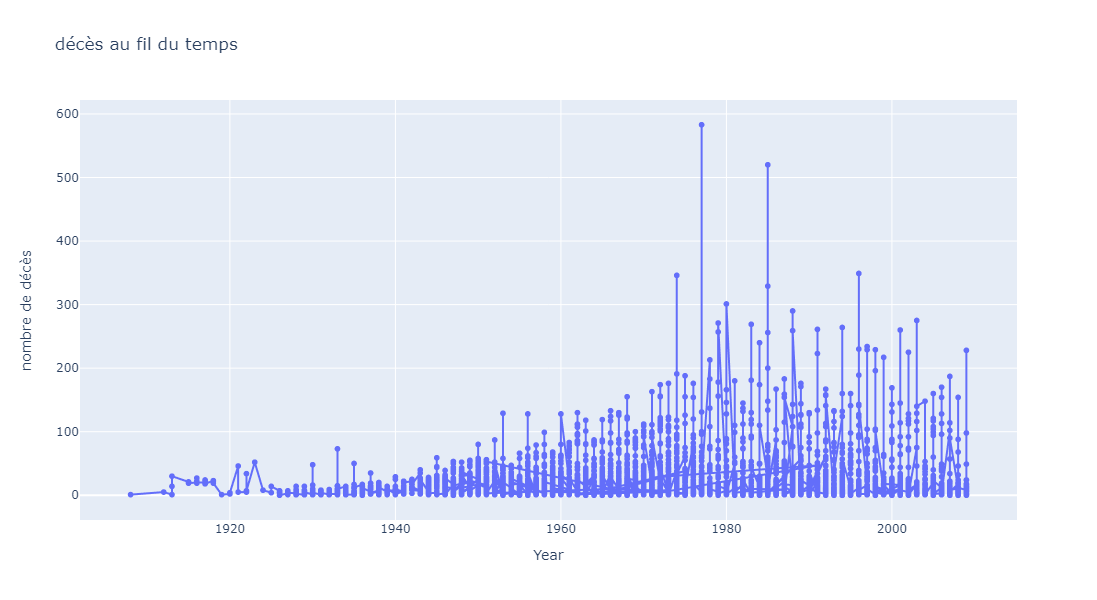

In [281]:

# Create an interactive line plot using Plotly Express
fig = px.line(df_cleaned, x='Year', y='Fatalities', title='décès au fil du temps',
              labels={'Year': 'Year', 'Fatalities': 'nombre de décès'},
              markers=True, line_shape='linear', width=1200, height=600)

# Add hover information with the year
fig.update_traces(hovertemplate='%{x}: %{y} Fatalities')

# Show the interactive plot
fig.show()


### Plot 2 : Distribution des décès en 1977 par pays


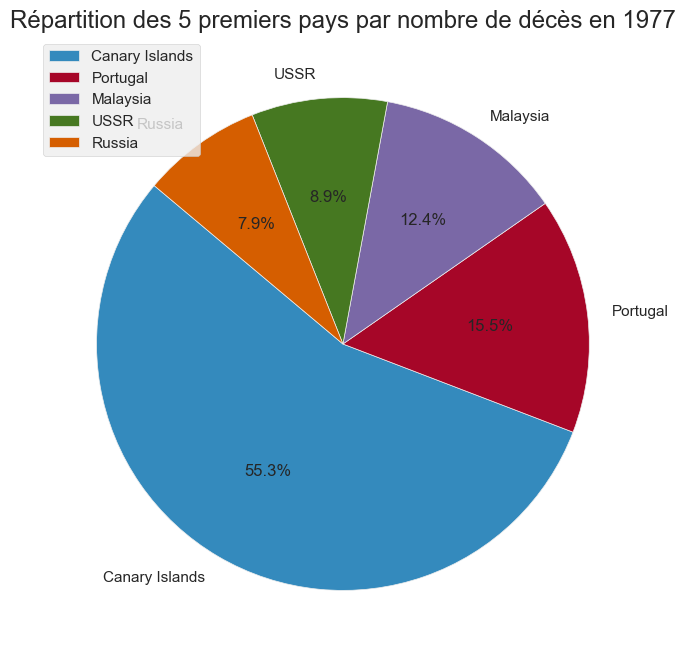

In [282]:
# Créer une copie du DataFrame pour l'année 1977
df_1977 = df_cleaned[df_cleaned['Year'] == 1977].copy()

# Ajouter une colonne 'Country' basée sur la colonne 'Location'
df_1977['Country'] = df_1977['Location'].str.split(',').str[-1].str.strip()
# Calculer le nombre total de fatalités par pays
fatalities_by_country = df_1977.groupby('Country')['Fatalities'].sum().reset_index()

# Sélectionner les 5 premiers pays
top_countries = fatalities_by_country.nlargest(5, 'Fatalities')

# Créer le pie chart avec les 5 premiers pays
plt.figure(figsize=(10, 8))
plt.pie(top_countries['Fatalities'], labels=top_countries['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des 5 premiers pays par nombre de décès en 1977')

# Ajouter une légende avec les noms des pays uniquement
plt.legend(top_countries['Country'], loc='upper left')
plt.show()
# USSR = Union des républiques socialistes soviétiques

### Plot 3: Nombre d'opérations en 1977 pour Canary Islands 

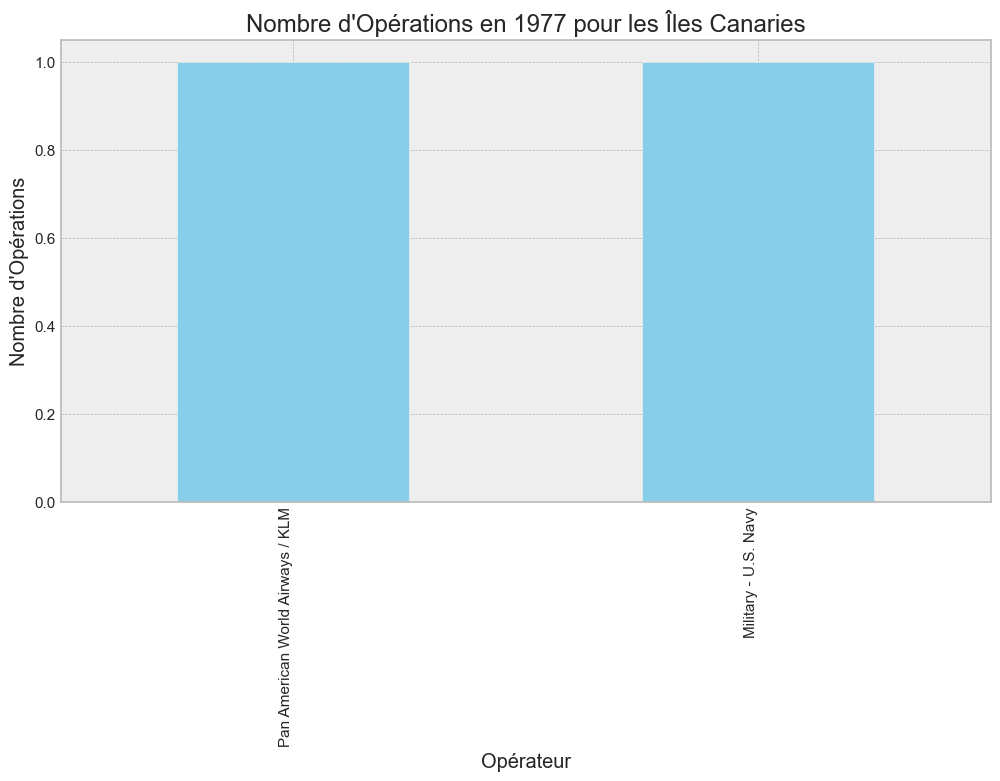

In [283]:
# Créer une copie du DataFrame pour l'année 1977
df_1977 = df_cleaned[df_cleaned['Year'] == 1977].copy()

# Ajouter une colonne 'Country' basée sur la colonne 'Location'
df_1977['Country'] = df_1977['Location'].str.split(',').str[-1].str.strip()

# Filtrer les opérations pour les Îles Canaries en 1977
selected_operations = df_1977[df_1977['Country'].isin(['Canary Islands'])]

# Compter le nombre d'opérations par opérateur
operations_count = selected_operations['Operator'].value_counts()

# Créer un histogramme
plt.figure(figsize=(12, 6))
plt.xticks(rotation=0, ha='right')  # Changement ici pour rotation=0
operations_count.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'Opérations en 1977 pour les Îles Canaries')
plt.xlabel('Opérateur')
plt.ylabel('Nombre d\'Opérations')
plt.show()


### plot 4 Les 10 principales compagnies aériennes avec le plus grand nombre d'accidents

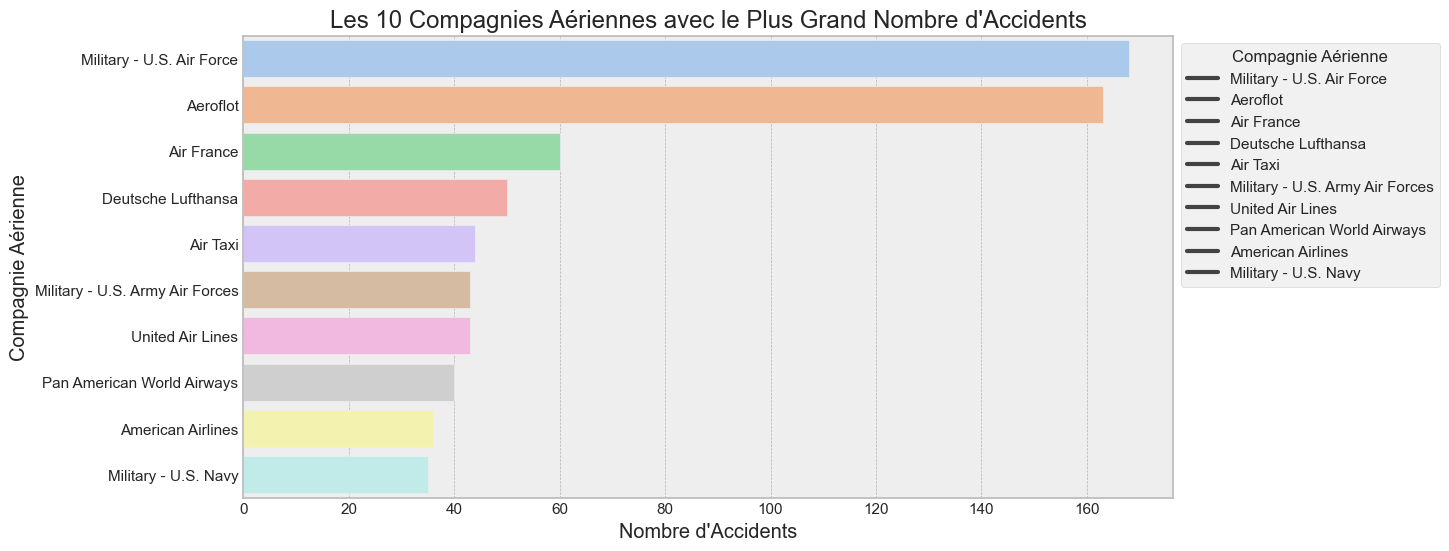

In [284]:
# Les 10 compagnies aériennes avec le plus grand nombre d'accidents
top_compagnies = df_cleaned['Operator'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_compagnies.values, y=top_compagnies.index, palette='pastel', hue=top_compagnies.index)
plt.title('Les 10 Compagnies Aériennes avec le Plus Grand Nombre d\'Accidents')
plt.xlabel('Nombre d\'Accidents')
plt.ylabel('Compagnie Aérienne')
plt.legend(title='Compagnie Aérienne', bbox_to_anchor=(1, 1), loc='upper left', labels=top_compagnies.index)
plt.show()


### plot 5 Calculer la distribution mensuelle des accidents


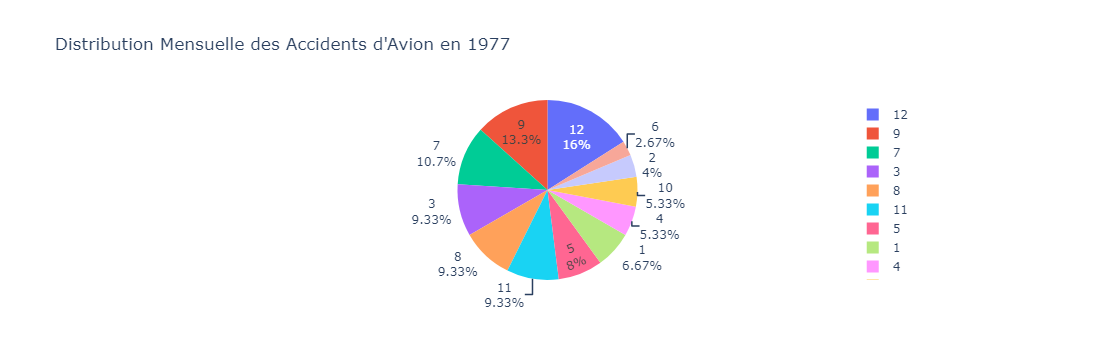

In [285]:
import plotly.express as px

# Filtrer le DataFrame pour l'année 1977
df_1977 = df_cleaned[df_cleaned['Year'] == 1977]

# Calculer la distribution mensuelle des accidents en 1977
distribution_mensuelle_1977 = df_1977['Month'].value_counts()

# Créer un diagramme circulaire interactif avec plotly.express
fig = px.pie(distribution_mensuelle_1977, values=distribution_mensuelle_1977.values, names=distribution_mensuelle_1977.index,
             title='Distribution Mensuelle des Accidents d\'Avion en 1977')

# Ajouter les pourcentages en tant que texte sur les secteurs
fig.update_traces(textinfo='percent+label')

# Afficher le diagramme circulaire interactif
fig.show()


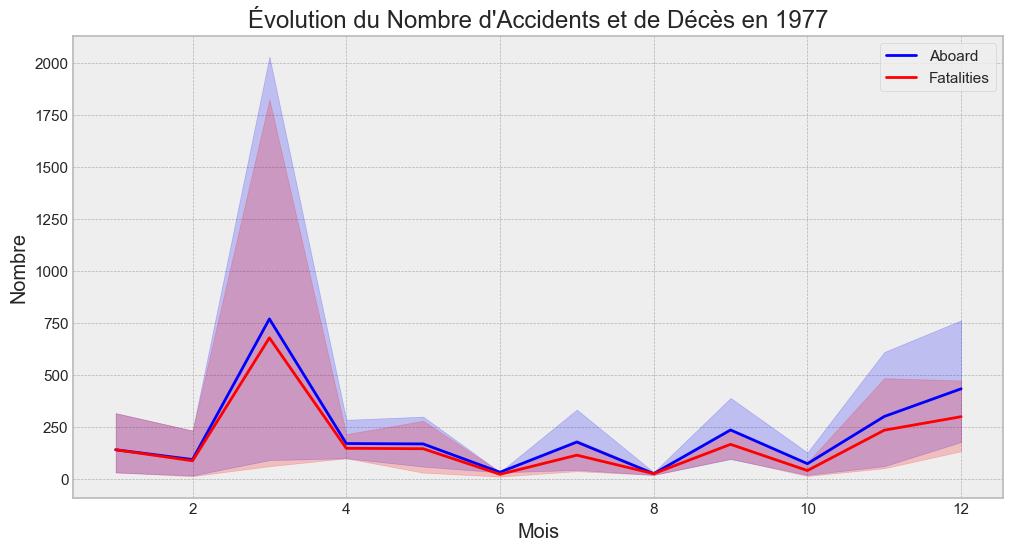

In [286]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Aboard', data=df_1977, estimator=np.sum, label='Aboard', color='blue')
sns.lineplot(x='Month', y='Fatalities', data=df_1977, estimator=np.sum, label='Fatalities', color='red')
plt.title('Évolution du Nombre d\'Accidents et de Décès en 1977')
plt.xlabel('Mois')
plt.ylabel('Nombre')
plt.legend()
plt.show()


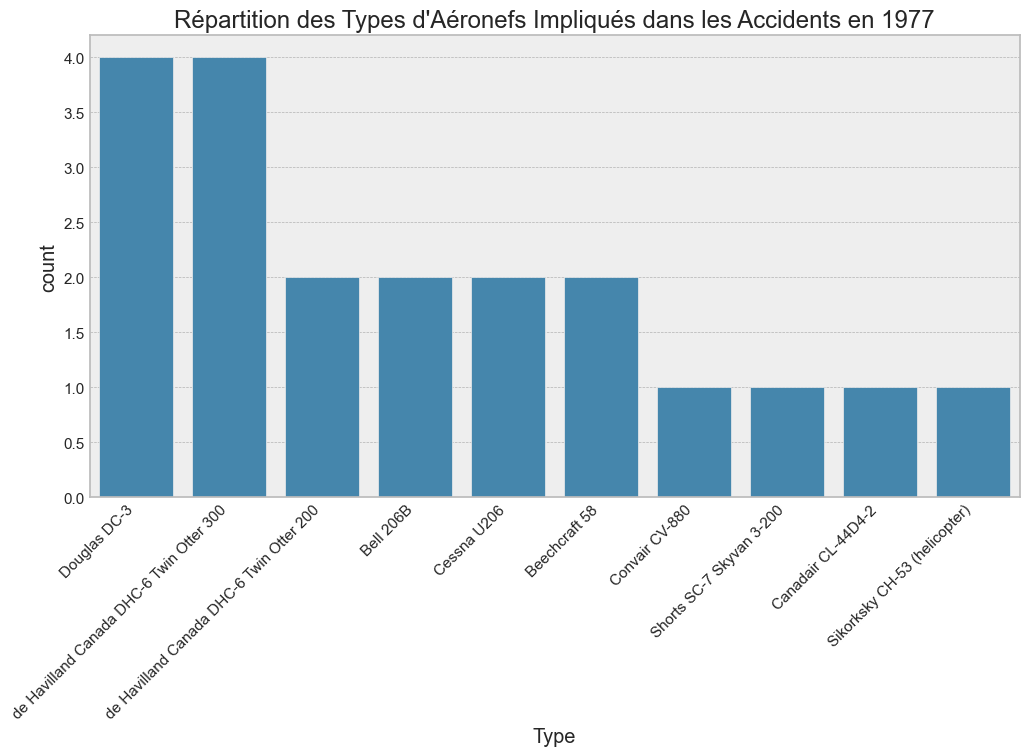

In [287]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=df_1977, order=df_1977['Type'].value_counts().index[:10])
plt.title('Répartition des Types d\'Aéronefs Impliqués dans les Accidents en 1977')
plt.xticks(rotation=45, ha='right')
plt.show()


## Regression lineaire pour les annees prochaines 

   Year  Fatalities
0  2010   25.696394
1  2011   25.820150
2  2012   25.943907
3  2013   26.067663
4  2014   26.191420


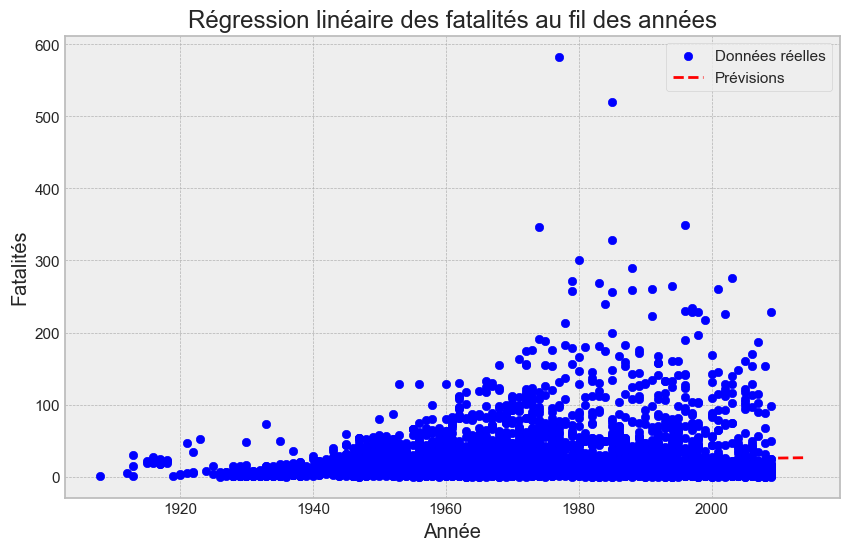

In [288]:
# Supposons que votre DataFrame s'appelle df_cleaned
df = df_cleaned.copy()

# Effectuer la régression linéaire
X = df['Year'].values.reshape(-1, 1)  
y_fatalities = df['Fatalities'].values 
regression_fatalities = LinearRegression()
regression_fatalities.fit(X, y_fatalities)

# Prévoir les fatalités pour les années suivantes
annees_suivantes = [df['Year'].max() + i for i in range(1, 6)]
previsions_fatalities = regression_fatalities.predict(np.array(annees_suivantes).reshape(-1, 1))

# Créer un DataFrame pour les prévisions
previsions = pd.DataFrame({
    'Year': annees_suivantes,
    'Fatalities': previsions_fatalities
})

# Afficher les prévisions
print(previsions)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Fatalities'], label='Données réelles', color='blue')
plt.plot(previsions['Year'], previsions['Fatalities'], label='Prévisions', color='red', linestyle='dashed')
plt.title('Régression linéaire des fatalités au fil des années')
plt.xlabel('Année')
plt.ylabel('Fatalités')
plt.legend()
plt.show()
